In [11]:
import pathlib, os
from pathlib import Path

print(len(os.listdir('handwriting_dataset/train')))
print(len(os.listdir('handwriting_dataset/test')))
print(len(os.listdir('handwriting_dataset/validation')))


10000
2000
3000


In [25]:
import pandas as pd

train_dir = Path('handwriting_dataset/train')
train_labels = pd.read_csv('written_name_train.csv')

test_dir = Path('handwriting_dataset/test')
test_labels = pd.read_csv('written_name_test.csv')

val_dir = Path('handwriting_dataset/validation')
val_labels = pd.read_csv('written_name_val.csv')



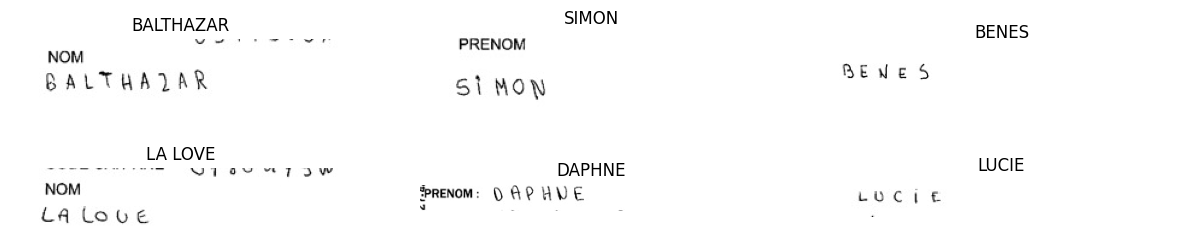

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = train_dir / train_labels.loc[i, 'FILENAME']   
    image = cv2.imread(str(img_dir), cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train_labels.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
print(f"train_labelsing set missing values: {train_labels['IDENTITY'].isnull().sum()}")
print(f"Validation set missing values: {val_labels['IDENTITY'].isnull().sum()}")

train_labels.dropna(axis=0, inplace=True)
val_labels.dropna(axis=0, inplace=True)

print(f"Number of unreadable images: {train_labels[train_labels['IDENTITY'] == 'UNREADABLE'].value_counts().sum()}")
print(f"Number of empty images: {train_labels[train_labels['IDENTITY'] == 'EMPTY'].value_counts().sum()}")
lowercase_count = train_labels[train_labels['IDENTITY'].str.contains(r'[a-z]', regex=True)].shape[0]
print(f"Number of labels with lowercase: {lowercase_count}")

train_labelsing set missing values: 0
Validation set missing values: 0
Number of unreadable images: 102
Number of empty images: 1796
Number of labels with lowercase: 17


In [34]:
train_labels = train_labels[train_labels['IDENTITY'] != 'UNREADABLE']
train_labels = train_labels[train_labels['IDENTITY'] != 'EMPTY']
train_labels['IDENTITY'] = train_labels['IDENTITY'].str.upper()
train_labels.reset_index(inplace = True, drop=True) 

In [ ]:
val_labels = val_labels[val_labels['IDENTITY'] != 'UNREADABLE']
val_labels = val_labels[val_labels['IDENTITY'] != 'EMPTY']
val_labels['IDENTITY'] = val_labels['IDENTITY'].str.upper()
val_labels.reset_index(inplace = True, drop=True)